<img src="./julia_logo.png" align="center" width="400"/>

System information (for reproducibility)

In [1]:
versioninfo()

Julia Version 1.8.5
Commit 17cfb8e65ea (2023-01-08 06:45 UTC)
Platform Info:
  OS: macOS (arm64-apple-darwin21.5.0)
  CPU: 12 × Apple M2 Max
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, apple-m1)
  Threads: 1 on 8 virtual cores
Environment:
  JULIA_EDITOR = code


Load packages:

In [2]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()
Pkg.status()

  Activating project at `~/Documents/github.com/ucla-biostat-257/2023spring/slides/03-juliaintro`


Status `~/Documents/github.com/ucla-biostat-257/2023spring/slides/03-juliaintro/Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.2
  [31c24e10] Distributions v0.25.86
  [6f49c342] RCall v0.13.14
  [37e2e46d] LinearAlgebra
  [9abbd945] Profile
  [2f01184e] SparseArrays


In [3]:
using BenchmarkTools, Distributions, RCall
using LinearAlgebra, Profile, SparseArrays

## What's Julia?

> Julia is a high-level, high-performance dynamic programming language for technical computing, with syntax that is familiar to users of other technical computing environments

* History:
  - Project started in 2009. First public release in 2012 
  - Creators: Jeff Bezanson, Alan Edelman, Stefan Karpinski, Viral Shah
  - First major release v1.0 was released on Aug 8, 2018
  - Current stable release v1.7.2

* Aim to solve the notorious **two language problem**: Prototype code goes into high-level languages like R/Python, production code goes into low-level language like C/C++. 

    Julia aims to:
> Walks like Python. Runs like C.

<img src="./julia_vs_otherlang.png" align="center" width="600"/>

See <https://julialang.org/benchmarks/> for the details of benchmark.

* Write high-level, abstract code that closely resembles mathematical formulas
    - yet produces fast, low-level machine code that has traditionally only been generated by static languages.

* Julia is more than just "Fast R" or "Fast Matlab"
    - Performance comes from features that work well together.  
    - You can't just take the magic dust that makes Julia fast and sprinkle it on [language of choice]

## Learning resources

1. The (free) online course [Introduction to Julia](https://juliaacademy.com/p/intro-to-julia), by Jane Herriman. 

2. Cheat sheet: [The Fast Track to Julia](https://juliadocs.github.io/Julia-Cheat-Sheet/).  

3. Browse the Julia [documentation](https://docs.julialang.org/en).  

4. For Matlab users, read [Noteworthy Differences From Matlab](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-MATLAB-1).  

    For R users, read [Noteworthy Differences From R](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-R-1).  

    For Python users, read [Noteworthy Differences From Python](https://docs.julialang.org/en/v1/manual/noteworthy-differences/?highlight=matlab#Noteworthy-differences-from-Python-1).  

5. The [Learning page](http://julialang.org/learning/) on Julia's website has pointers to many other learning resources.  

## Julia REPL (Read-Evaluation-Print-Loop)

The `Julia` REPL, or `Julia` shell, has at least five modes.

1. **Default mode** is the Julian prompt `julia>`. Type backspace in other modes to enter default mode.    

2. **Help mode** `help?>`. Type `?` to enter help mode. `?search_term` does a fuzzy search for `search_term`.  

3. **Shell mode** `shell>`. Type `;` to enter shell mode.  

4. **Package mode** `(@v1.8) pkg>`. Type `]` to enter package mode for managing Julia packages (install, uninstall, update, ...).

5. **Search mode** `(reverse-i-search)`. Press `ctrl+R` to enter search model. 

6. With `RCall.jl` package installed, we can enter the **R mode** by typing `$` (shift+4) at Julia REPL.

Some survival commands in Julia REPL:  
1. `exit()` or `Ctrl+D`: exit Julia.

2. `Ctrl+C`: interrupt execution.

3. `Ctrl+L`: clear screen.

0. Append `;` (semi-colon) to suppress displaying output from a command. Same as Matlab.

0. `include("filename.jl")` to source a Julia code file.

## Seek help

* Online help from REPL: `?function_name`.

* Google.

* Julia documentation: <https://docs.julialang.org/en/>.

* Look up source code: `@edit sin(π)`.

* Discourse: <https://discourse.julialang.org>.

* Friends.

## Which IDE?

* Julia homepage lists many choices: Juno, VS Code, Vim, ...

* Unfortunately at the moment there are no mature RStudio- or Matlab-like IDE for Julia yet.

* For dynamic document, e.g., homework, I recommend [Jupyter Notebook](https://jupyter.org/install.html) or [JupyterLab](http://jupyterlab.readthedocs.io/en/stable/). 

* For extensive Julia coding, myself has been happily using the editor [VS Code](https://code.visualstudio.com) with extensions `Julia` and `VS Code Jupyter Notebook Previewer` installed. 

## Julia package system

* Each Julia package is a Git repository. Each Julia package name ends with `.jl`. E.g., `Distributions.jl` package lives at <https://github.com/JuliaStats/Distributions.jl>.   
Google search with `PackageName.jl` usually leads to the package on github.com. 

* The package ecosystem is rapidly maturing; a complete list of **registered** packages (which are required to have a certain level of testing and documentation) is at [http://pkg.julialang.org/](http://pkg.julialang.org/).

* For example, the package called `Distributions.jl` is added with
```julia
# in Pkg mode
(@v1.8) pkg> add Distributions
```
and "removed" (although not completely deleted) with
```julia
# in Pkg mode
(@v1.8) pkg> rm Distributions
```
* The package manager provides a dependency solver that determines which packages are actually required to be installed.

* **Non-registered** packages are added by cloning the relevant Git repository. E.g.,
```julia
# in Pkg mode
(@v1.8) pkg> add https://github.com/OpenMendel/SnpArrays.jl
```

* A package needs only be added once, at which point it is downloaded into your local `.julia/packages` directory in your home directory. 

In [4]:
readdir(Sys.islinux() ? ENV["JULIA_PATH"] * "/pkg/packages" : ENV["HOME"] * "/.julia/packages")

398-element Vector{String}:
 "AMD"
 "ASL_jll"
 "AbstractFFTs"
 "AbstractTrees"
 "Adapt"
 "AlgebraicMultigrid"
 "Animations"
 "ArnoldiMethod"
 "Arpack"
 "Arpack_jll"
 "ArrayInterface"
 "ArrayInterfaceCore"
 "Arrow"
 ⋮
 "fzf_jll"
 "isoband_jll"
 "libaom_jll"
 "libass_jll"
 "libfdk_aac_jll"
 "libpng_jll"
 "libsixel_jll"
 "libsodium_jll"
 "libvorbis_jll"
 "x264_jll"
 "x265_jll"
 "xkbcommon_jll"

* Directory of a specific package can be queried by `pathof()`:

In [5]:
pathof(Distributions)

"/Users/huazhou/.julia/packages/Distributions/YQQXX/src/Distributions.jl"

* If you start having problems with packages that seem to be unsolvable, you may try just deleting your .julia directory and reinstalling all your packages. 

* Periodically, one should run `update` in Pkg mode, which checks for, downloads and installs updated versions of all the packages you currently have installed.

* `status` lists the status of all installed packages.

* Using functions in package.
```julia
using Distributions
```
This pulls all of the *exported* functions in the module into your local namespace, as you can check using the `whos()` command. An alternative is
```julia
import Distributions
```
Now, the functions from the Distributions package are available only using 
```julia
Distributions.<FUNNAME>
```
All functions, not only exported functions, are always available like this.

## Calling R from Julia

* The [`RCall.jl`](https://github.com/JuliaInterop/RCall.jl) package allows us to embed R code inside of Julia.

* There are also `PyCall.jl`, `MATLAB.jl`, `JavaCall.jl`, `CxxWrap.jl` packages for interfacing with other languages.

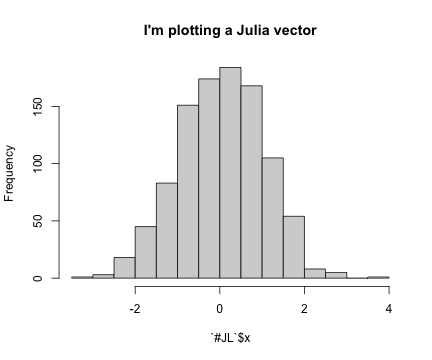

RObject{VecSxp}
$breaks
 [1] -3.5 -3.0 -2.5 -2.0 -1.5 -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5
[16]  4.0

$counts
 [1]   1   3  18  45  83 151 174 184 168 105  54   8   5   0   1

$density
 [1] 0.002 0.006 0.036 0.090 0.166 0.302 0.348 0.368 0.336 0.210 0.108 0.016
[13] 0.010 0.000 0.002

$mids
 [1] -3.25 -2.75 -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75  2.25
[13]  2.75  3.25  3.75

$xname
[1] "`#JL`$x"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [4]:
x = randn(1000)
# $ is the interpolation operator
R"""
hist($x, main = "I'm plotting a Julia vector")
"""

┌ Warning: RCall.jl: Warning: `qplot()` was deprecated in ggplot2 3.4.0.
└ @ RCall ~/.julia/packages/RCall/Wyd74/src/io.jl:172
┌ Warning: RCall.jl: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
└ @ RCall ~/.julia/packages/RCall/Wyd74/src/io.jl:172


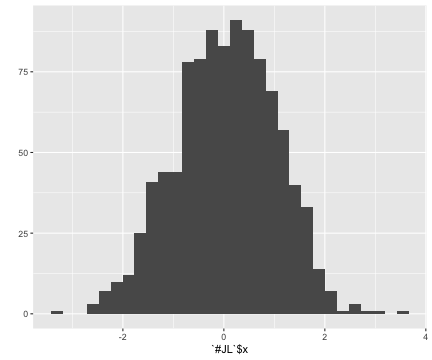

RObject{VecSxp}


In [5]:
R"""
library(ggplot2)
qplot($x)
"""

In [6]:
x = R"""
rnorm(10)
"""

RObject{RealSxp}
 [1] -1.41967050  1.63799964 -0.83312925 -0.57597899  0.04029886  0.37450020
 [7] -0.40266160  1.56984897 -0.73235580  0.61712904


In [7]:
# collect R variable into Julia workspace
y = collect(x)

10-element Vector{Float64}:
 -1.4196705048515263
  1.6379996400684596
 -0.8331292519054966
 -0.5759789864435073
  0.04029885822303783
  0.3745001994605138
 -0.40266159627300596
  1.5698489734448504
 -0.7323557967723695
  0.61712903504695

* Access Julia variables in R REPL mode:
```julia
julia> x = rand(5) # Julia variable
R> y <- $x
```

* Pass Julia expression in R REPL mode:
```julia
R> y <- $(rand(5))
```

* Put Julia variable into R environment:
```julia
julia> @rput x
R> x
```

* Get R variable into Julia environment:
```julia
R> r <- 2
Julia> @rget r
```

* If you want to call Julia within R, check out the [`JuliaCall`](https://www.rdocumentation.org/packages/JuliaCall/) package.

## Some basic Julia code

In [8]:
# an integer, same as int in R
y = 1

1

In [9]:
# query type of a Julia object
typeof(y)

Int64

In [10]:
# a Float64 number, same as double in R
y = 1.0

1.0

In [11]:
typeof(y) 

Float64

In [12]:
# Greek letters:  `\pi<tab>`
π

π = 3.1415926535897...

In [13]:
typeof(π)

Irrational{:π}

In [14]:
# Greek letters:  `\theta<tab>`
θ = y + π

4.141592653589793

In [15]:
# emoji! `\:kissing_cat:<tab>`
😽 = 5.0
😽 + 1

6.0

In [16]:
# `\alpha<tab>\hat<tab>`
α̂ = π

π = 3.1415926535897...

For a list of unicode symbols that can be tab-completed, see <https://docs.julialang.org/en/v1/manual/unicode-input/>. Or in the help mode, type `?` followed by the unicode symbol you want to input.

In [17]:
# vector of Float64 0s
x = zeros(5)

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [18]:
# vector Int64 0s
x = zeros(Int, 5)

5-element Vector{Int64}:
 0
 0
 0
 0
 0

In [19]:
# matrix of Float64 0s
x = zeros(5, 3)

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [20]:
# matrix of Float64 1s
x = ones(5, 3)

5×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [21]:
# define array without initialization
x = Matrix{Float64}(undef, 5, 3)

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [22]:
# fill a matrix by 0s
fill!(x, 0)

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [23]:
# initialize an array to be constant 2.5
fill(2.5, (5, 3))

5×3 Matrix{Float64}:
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5

In [24]:
# rational number
a = 3//5

3//5

In [25]:
typeof(a)

Rational{Int64}

In [26]:
b = 3//7

3//7

In [27]:
a + b

36//35

In [28]:
# uniform [0, 1) random numbers
x = rand(5, 3)

5×3 Matrix{Float64}:
 0.0618133  0.372292  0.578961
 0.393624   0.707255  0.607262
 0.520261   0.152801  0.960004
 0.933311   0.524236  0.165357
 0.833547   0.799936  0.345202

In [29]:
# uniform random numbers (in single precision)
x = rand(Float16, 5, 3)

5×3 Matrix{Float16}:
 0.2554   0.873    0.4907
 0.2119   0.2373   0.7305
 0.635    0.5376   0.598
 0.04492  0.329    0.6177
 0.539    0.02246  0.3193

In [30]:
# random numbers from {1,...,5}
x = rand(1:5, 5, 3)

5×3 Matrix{Int64}:
 3  3  3
 4  1  4
 2  2  2
 2  3  5
 3  5  4

In [31]:
# standard normal random numbers
x = randn(5, 3)

5×3 Matrix{Float64}:
  1.25549   -0.977762  -0.731782
 -0.747323   1.15886   -0.31279
  0.685052  -0.706905  -0.94162
 -0.561886   0.470106   0.277188
  0.492485   1.77494   -1.32089

In [32]:
# range
1:10

1:10

In [33]:
typeof(1:10)

UnitRange{Int64}

In [34]:
1:2:10

1:2:9

In [35]:
typeof(1:2:10)

StepRange{Int64, Int64}

In [36]:
# integers 1-10
x = collect(1:10)

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [37]:
# or equivalently
[1:10...]

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [38]:
# Float64 numbers 1-10
x = collect(1.0:10)

10-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [39]:
# convert to a specific type
convert(Vector{Float64}, 1:10)

10-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

## Matrices and vectors

### Dimensions

In [40]:
x = randn(5, 3)

5×3 Matrix{Float64}:
 0.939251   1.44933     0.292228
 0.719082   0.202238    0.54028
 0.292684  -0.0459774   0.359842
 1.78906   -0.0834     -0.597591
 1.31333   -0.403823    0.0787643

In [41]:
size(x)

(5, 3)

In [42]:
size(x, 1) # nrow() in R

5

In [43]:
size(x, 2) # ncol() in R

3

In [44]:
# total number of elements
length(x)

15

### Indexing

In [45]:
# 5 × 5 matrix of random Normal(0, 1)
x = randn(5, 5)

5×5 Matrix{Float64}:
 -0.220457  -0.784907  -0.0107135  -0.839175   0.373247
  0.31156   -0.140819  -1.01431    -0.223091   1.07936
  1.16377    0.845905   1.11205     0.844503   0.556731
  0.418375  -1.48909    0.302416   -0.160579  -1.04702
 -1.89445    0.895741   0.902861    1.95183    0.372048

In [46]:
# first column
x[:, 1]

5-element Vector{Float64}:
 -0.22045692115934876
  0.31156040749792346
  1.1637653696699335
  0.4183745136073369
 -1.8944457100596193

In [47]:
# first row
x[1, :]

5-element Vector{Float64}:
 -0.22045692115934876
 -0.784906694205438
 -0.010713513624510666
 -0.8391749114720862
  0.3732467195193384

In [48]:
# sub-array
x[1:2, 2:3]

2×2 Matrix{Float64}:
 -0.784907  -0.0107135
 -0.140819  -1.01431

In [49]:
# getting a subset of a matrix creates a copy, but you can also create "views"
z = view(x, 1:2, 2:3)

2×2 view(::Matrix{Float64}, 1:2, 2:3) with eltype Float64:
 -0.784907  -0.0107135
 -0.140819  -1.01431

In [50]:
# same as
@views z = x[1:2, 2:3]

2×2 view(::Matrix{Float64}, 1:2, 2:3) with eltype Float64:
 -0.784907  -0.0107135
 -0.140819  -1.01431

In [51]:
# change in z (view) changes x as well
z[2, 2] = 0.0
x

5×5 Matrix{Float64}:
 -0.220457  -0.784907  -0.0107135  -0.839175   0.373247
  0.31156   -0.140819   0.0        -0.223091   1.07936
  1.16377    0.845905   1.11205     0.844503   0.556731
  0.418375  -1.48909    0.302416   -0.160579  -1.04702
 -1.89445    0.895741   0.902861    1.95183    0.372048

In [52]:
# y points to same data as x
y = x

5×5 Matrix{Float64}:
 -0.220457  -0.784907  -0.0107135  -0.839175   0.373247
  0.31156   -0.140819   0.0        -0.223091   1.07936
  1.16377    0.845905   1.11205     0.844503   0.556731
  0.418375  -1.48909    0.302416   -0.160579  -1.04702
 -1.89445    0.895741   0.902861    1.95183    0.372048

In [53]:
# x and y point to same data
pointer(x), pointer(y)

(Ptr{Float64} @0x0000000109735340, Ptr{Float64} @0x0000000109735340)

In [54]:
# changing y also changes x
y[:, 1] .= 0
x

5×5 Matrix{Float64}:
 0.0  -0.784907  -0.0107135  -0.839175   0.373247
 0.0  -0.140819   0.0        -0.223091   1.07936
 0.0   0.845905   1.11205     0.844503   0.556731
 0.0  -1.48909    0.302416   -0.160579  -1.04702
 0.0   0.895741   0.902861    1.95183    0.372048

In [55]:
# create a new copy of data
z = copy(x)

5×5 Matrix{Float64}:
 0.0  -0.784907  -0.0107135  -0.839175   0.373247
 0.0  -0.140819   0.0        -0.223091   1.07936
 0.0   0.845905   1.11205     0.844503   0.556731
 0.0  -1.48909    0.302416   -0.160579  -1.04702
 0.0   0.895741   0.902861    1.95183    0.372048

In [56]:
pointer(x), pointer(z)

(Ptr{Float64} @0x0000000109735340, Ptr{Float64} @0x000000029be50340)

### Concatenate matrices

In [57]:
# 3-by-1 vector
[1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [58]:
# 1-by-3 array
[1 2 3]

1×3 Matrix{Int64}:
 1  2  3

In [59]:
# multiple assignment by tuple
x, y, z = randn(5, 3), randn(5, 2), randn(3, 5)

([1.5236869106348467 0.5139621810906009 0.5164056996115859; -0.6552363201387524 -0.7418825024779218 0.0840906338854781; … ; -0.12606080732801037 -1.6053620297253046 -0.149373161748098; -1.220485313759046 -0.5398902579307172 -0.09035838801844885], [-1.294444872558438 0.1569367266147144; 0.6601895118266585 0.3854917214522636; … ; 0.10514478836725648 -0.3186013495331608; -0.6965772673902703 1.0409344731760826], [-1.0091539394541005 1.1595549255310813 … -0.4583101868904597 2.0627988861081756; -0.844455392074053 -0.32396846797218487 … 0.60103836777789 0.16201609408782788; -0.33730913284100206 -0.4075782492440983 … 0.46775356315752653 0.10040311951653196])

In [60]:
[x y] # 5-by-5 matrix

5×5 Matrix{Float64}:
  1.52369    0.513962   0.516406   -1.29444    0.156937
 -0.655236  -0.741883   0.0840906   0.66019    0.385492
  0.275216  -1.31597   -0.148086   -0.73666    1.30883
 -0.126061  -1.60536   -0.149373    0.105145  -0.318601
 -1.22049   -0.53989   -0.0903584  -0.696577   1.04093

In [61]:
[x y; z] # 8-by-5 matrix

8×5 Matrix{Float64}:
  1.52369    0.513962   0.516406   -1.29444    0.156937
 -0.655236  -0.741883   0.0840906   0.66019    0.385492
  0.275216  -1.31597   -0.148086   -0.73666    1.30883
 -0.126061  -1.60536   -0.149373    0.105145  -0.318601
 -1.22049   -0.53989   -0.0903584  -0.696577   1.04093
 -1.00915    1.15955    0.843906   -0.45831    2.0628
 -0.844455  -0.323968   0.823323    0.601038   0.162016
 -0.337309  -0.407578  -0.318768    0.467754   0.100403

### Dot operation (broadcasting)

Dot operation in Julia is elementwise operation, similar to Matlab.

In [62]:
x = randn(5, 3)

5×3 Matrix{Float64}:
  0.265859  -1.10381    0.248883
  0.805902  -0.770942   0.729882
 -0.154185  -0.545987   0.0236625
  1.35713   -0.981065  -0.36902
 -1.17611    2.08923   -0.296247

In [63]:
y = ones(5, 3)

5×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [64]:
x .* y # same x * y in R

5×3 Matrix{Float64}:
  0.265859  -1.10381    0.248883
  0.805902  -0.770942   0.729882
 -0.154185  -0.545987   0.0236625
  1.35713   -0.981065  -0.36902
 -1.17611    2.08923   -0.296247

In [65]:
x .^ (-2)

5×3 Matrix{Float64}:
 14.1481    0.820757    16.1439
  1.5397    1.68251      1.87713
 42.0645    3.35456   1785.98
  0.542949  1.03897      7.34344
  0.722938  0.229102    11.3944

In [66]:
sin.(x)

5×3 Matrix{Float64}:
  0.262738  -0.892927   0.246322
  0.721455  -0.696811   0.666782
 -0.153575  -0.519261   0.0236603
  0.977259  -0.83109   -0.360702
 -0.923119   0.868598  -0.291933

### Basic linear algebra

In [67]:
x = randn(5)

5-element Vector{Float64}:
  0.14776029217026512
  1.0942373699076249
  0.5277609100590055
 -0.06780656031134644
 -0.049205520683995925

In [68]:
# vector L2 norm
norm(x)

1.2266780411819345

In [69]:
# same as
sqrt(sum(abs2, x))

1.2266780411819345

In [70]:
y = randn(5) # another vector
# dot product
dot(x, y) # x' * y

0.7668527433881462

In [71]:
# same as
x'y

0.7668527433881462

In [72]:
x, y = randn(5, 3), randn(3, 2)
# matrix multiplication, same as %*% in R
x * y

5×2 Matrix{Float64}:
  0.0687908   0.116451
 -2.32608     0.292858
 -3.1777     -2.88993
  0.0919411   0.168679
 -1.57637    -1.58967

In [73]:
x = randn(3, 3)

3×3 Matrix{Float64}:
  1.93517    0.14035    -1.13738
 -0.114424  -0.305294   -0.153025
 -0.124041  -0.0724948   0.794556

In [74]:
# conjugate transpose
x'

3×3 adjoint(::Matrix{Float64}) with eltype Float64:
  1.93517  -0.114424  -0.124041
  0.14035  -0.305294  -0.0724948
 -1.13738  -0.153025   0.794556

In [75]:
b = rand(3)
x'b # same as x' * b

3-element Vector{Float64}:
  0.21196341234149105
 -0.28657347656185017
  0.16049580723509432

In [76]:
# trace
tr(x)

2.4244305065596317

In [77]:
det(x)

-0.4418276901827811

In [78]:
rank(x)

3

### Sparse matrices

In [79]:
# 10-by-10 sparse matrix with sparsity 0.1
X = sprandn(10, 10, .1)

10×10 SparseMatrixCSC{Float64, Int64} with 13 stored entries:
   ⋅         ⋅        ⋅   -2.08496  …    ⋅         ⋅         ⋅ 
  1.11011    ⋅        ⋅     ⋅            ⋅         ⋅        0.711669
   ⋅         ⋅        ⋅     ⋅            ⋅         ⋅         ⋅ 
   ⋅         ⋅        ⋅     ⋅            ⋅         ⋅        0.464126
   ⋅         ⋅        ⋅     ⋅            ⋅        0.369519   ⋅ 
   ⋅         ⋅        ⋅     ⋅       …    ⋅         ⋅         ⋅ 
   ⋅         ⋅        ⋅     ⋅            ⋅         ⋅         ⋅ 
 -0.724306   ⋅        ⋅     ⋅            ⋅         ⋅         ⋅ 
   ⋅        1.27324   ⋅     ⋅          -0.346532   ⋅        0.806238
   ⋅         ⋅        ⋅     ⋅            ⋅         ⋅         ⋅ 

In [80]:
# dump() in Julia is like str() in R
dump(X)

SparseMatrixCSC{Float64, Int64}
  m: Int64 10
  n: Int64 10
  colptr: Array{Int64}((11,)) [1, 3, 4, 4, 5, 7, 8, 9, 10, 11, 14]
  rowval: Array{Int64}((13,)) [2, 8, 9, 1, 6, 9, 2, 6, 9, 5, 2, 4, 9]
  nzval: Array{Float64}((13,)) [1.1101052470820212, -0.7243058137723242, 1.2732373369368488, -2.0849564225422954, -0.6454286535475916, -0.6870345959202688, -1.0519826476702205, 1.4173238506989323, -0.34653195368807055, 0.3695189602769394, 0.7116687087550461, 0.4641256949143379, 0.8062378047439631]


In [81]:
# convert to dense matrix; be cautious when dealing with big data
Xfull = convert(Matrix{Float64}, X)

10×10 Matrix{Float64}:
  0.0       0.0      0.0  -2.08496  …   0.0       0.0       0.0
  1.11011   0.0      0.0   0.0          0.0       0.0       0.711669
  0.0       0.0      0.0   0.0          0.0       0.0       0.0
  0.0       0.0      0.0   0.0          0.0       0.0       0.464126
  0.0       0.0      0.0   0.0          0.0       0.369519  0.0
  0.0       0.0      0.0   0.0      …   0.0       0.0       0.0
  0.0       0.0      0.0   0.0          0.0       0.0       0.0
 -0.724306  0.0      0.0   0.0          0.0       0.0       0.0
  0.0       1.27324  0.0   0.0         -0.346532  0.0       0.806238
  0.0       0.0      0.0   0.0          0.0       0.0       0.0

In [82]:
# convert a dense matrix to sparse matrix
sparse(Xfull)

10×10 SparseMatrixCSC{Float64, Int64} with 13 stored entries:
   ⋅         ⋅        ⋅   -2.08496  …    ⋅         ⋅         ⋅ 
  1.11011    ⋅        ⋅     ⋅            ⋅         ⋅        0.711669
   ⋅         ⋅        ⋅     ⋅            ⋅         ⋅         ⋅ 
   ⋅         ⋅        ⋅     ⋅            ⋅         ⋅        0.464126
   ⋅         ⋅        ⋅     ⋅            ⋅        0.369519   ⋅ 
   ⋅         ⋅        ⋅     ⋅       …    ⋅         ⋅         ⋅ 
   ⋅         ⋅        ⋅     ⋅            ⋅         ⋅         ⋅ 
 -0.724306   ⋅        ⋅     ⋅            ⋅         ⋅         ⋅ 
   ⋅        1.27324   ⋅     ⋅          -0.346532   ⋅        0.806238
   ⋅         ⋅        ⋅     ⋅            ⋅         ⋅         ⋅ 

In [83]:
# syntax for sparse linear algebra is same as dense linear algebra
β = ones(10)
X * β

10-element Vector{Float64}:
 -2.0849564225422954
  0.7697913081668467
  0.0
  0.4641256949143379
  0.3695189602769394
  0.7718951971513407
  0.0
 -0.7243058137723242
  1.0459085920724727
  0.0

In [84]:
# many functions apply to sparse matrices as well
sum(X)

0.6119775162673176

## Control flow and loops

* if-elseif-else-end

```julia
if condition1
    # do something
elseif condition2
    # do something
else
    # do something
end
```

* `for` loop

```julia
for i in 1:10
    println(i)
end
```

* Nested `for` loop:

```julia
for i in 1:10
    for j in 1:5
        println(i * j)
    end
end
```
Same as

```julia
for i in 1:10, j in 1:5
    println(i * j)
end
```

* Exit loop:

```julia
for i in 1:10
    # do something
    if condition1
        break # skip remaining loop
    end
end
```

* Exit iteration:  

```julia
for i in 1:10
    # do something
    if condition1
        continue # skip to next iteration
    end
    # do something
end
```

## Functions 

* In Julia, all arguments to functions are **passed by reference**, in contrast to R and Matlab.

* Function names ending with `!` indicates that function mutates at least one argument, typically the first.
```julia
sort!(x) # vs sort(x)
```

* Function definition

```julia
function func(req1, req2; key1=dflt1, key2=dflt2)
    # do stuff
    return out1, out2, out3
end
```
**Required arguments** are separated with a comma and use the positional notation.  
**Optional arguments** need a default value in the signature.  
**Semicolon** is not required in function call.  
**return** statement is optional.  
Multiple outputs can be returned as a **tuple**, e.g., `return out1, out2, out3`.  

* Anonymous functions, e.g., `x -> x^2`, is commonly used in collection function or list comprehensions.
```julia
map(x -> x^2, y) # square each element in x
```

* Functions can be nested:

```julia
function outerfunction()
    # do some outer stuff
    function innerfunction()
        # do inner stuff
        # can access prior outer definitions
    end
    # do more outer stuff
end
```

* Functions can be vectorized using the Dot syntax:

In [85]:
# defined for scalar
function myfunc(x)
    return sin(x^2)
end

x = randn(5, 3)
myfunc.(x)

5×3 Matrix{Float64}:
 0.877187    0.267272     0.00485173
 0.166907    0.706237    -0.99985
 0.00223641  0.0991335    0.134045
 0.564876    0.176001     0.186596
 0.0687653   0.00020559   0.459943

* **Collection function** (think this as the series of `apply` functions in R).

    Apply a function to each element of a collection:

```julia
map(f, coll) # or
map(coll) do elem
    # do stuff with elem
    # must contain return
end
```

In [86]:
map(x -> sin(x^2), x)

5×3 Matrix{Float64}:
 0.877187    0.267272     0.00485173
 0.166907    0.706237    -0.99985
 0.00223641  0.0991335    0.134045
 0.564876    0.176001     0.186596
 0.0687653   0.00020559   0.459943

In [87]:
map(x) do elem
    elem = elem^2
    return sin(elem)
end

5×3 Matrix{Float64}:
 0.877187    0.267272     0.00485173
 0.166907    0.706237    -0.99985
 0.00223641  0.0991335    0.134045
 0.564876    0.176001     0.186596
 0.0687653   0.00020559   0.459943

In [88]:
# Mapreduce
mapreduce(x -> sin(x^2), +, x)

2.7144048551900752

In [89]:
# same as
sum(x -> sin(x^2), x)

2.7144048551900752

* List **comprehension**

In [90]:
[sin(2i + j) for i in 1:5, j in 1:3] # similar to Python

5×3 Matrix{Float64}:
  0.14112   -0.756802  -0.958924
 -0.958924  -0.279415   0.656987
  0.656987   0.989358   0.412118
  0.412118  -0.544021  -0.99999
 -0.99999   -0.536573   0.420167

## Type system

* Every variable in Julia has a type.

* When thinking about types, think about sets.

* Everything is a subtype of the abstract type `Any`.

* An abstract type defines a set of types
    - Consider types in Julia that are a `Number`:

<img src="tree.png" width="600" align="center"/>

* We can explore type hierarchy with `typeof()`, `supertype()`, and `subtypes()`.

In [91]:
typeof(1.0), typeof(1)

(Float64, Int64)

In [92]:
supertype(Float64)

AbstractFloat

In [93]:
subtypes(AbstractFloat)

4-element Vector{Any}:
 BigFloat
 Float16
 Float32
 Float64

In [94]:
# Is Float64 a subtype of AbstractFloat?
Float64 <: AbstractFloat

true

In [95]:
# On 64bit machine, Int == Int64
Int == Int64

true

In [96]:
# convert to Float64
convert(Float64, 1)

1.0

In [97]:
# same as
Float64(1)

1.0

In [98]:
# Float32 vector
x = randn(Float32, 5)

5-element Vector{Float32}:
  0.3428847
  2.2693257
 -0.7761649
  0.19831468
  0.41333815

In [99]:
# convert to Float64
convert(Vector{Float64}, x)

5-element Vector{Float64}:
  0.34288468956947327
  2.2693257331848145
 -0.7761648893356323
  0.19831468164920807
  0.41333815455436707

In [100]:
# same as
Float64.(x)

5-element Vector{Float64}:
  0.34288468956947327
  2.2693257331848145
 -0.7761648893356323
  0.19831468164920807
  0.41333815455436707

In [101]:
# convert Float64 to Int64
convert(Int, 1.0)

1

In [102]:
convert(Int, 1.5) # should use round(1.5)

LoadError: InexactError: Int64(1.5)

In [103]:
round(Int, 1.5)

2

## Multiple dispatch

* Multiple dispatch lies in the core of Julia design. It allows built-in and user-defined functions to be overloaded for different combinations of argument types.

* Let's consider a simple "doubling" function:

In [105]:
g(x) = x + x

g (generic function with 1 method)

In [106]:
g(1.5)

3.0

This definition is too broad, since some things, e.g., strings, can't be added 

In [107]:
g("hello world")

LoadError: MethodError: no method matching +(::String, ::String)
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:591
[0m  +([91m::ChainRulesCore.Tangent{P}[39m, ::P) where P at ~/.julia/packages/ChainRulesCore/a4mIA/src/tangent_arithmetic.jl:146
[0m  +([91m::ChainRulesCore.AbstractThunk[39m, ::Any) at ~/.julia/packages/ChainRulesCore/a4mIA/src/tangent_arithmetic.jl:122
[0m  ...

* This definition is correct but too restrictive, since any `Number` can be added.

In [108]:
g(x::Float64) = x + x

g (generic function with 2 methods)

* This definition will automatically work on the entire type tree above!

In [109]:
g(x::Number) = x + x

g (generic function with 3 methods)

This is a lot nicer than 
```julia
function g(x)
    if isa(x, Number)
        return x + x
    else
        throw(ArgumentError("x should be a number"))
    end
end
```

* `methods(func)` function display all methods defined for `func`.

In [110]:
methods(g)

# 3 methods for generic function "g":
[1] g(x::Float64) in Main at In[108]:1
[2] g(x::Number) in Main at In[109]:1
[3] g(x) in Main at In[105]:1

* When calling a function with multiple definitions, Julia will search from the narrowest signature to the broadest signature.

* `@which func(x)` marco tells which method is being used for argument signature `x`.

In [111]:
# an Int64 input
@which g(1)

g(x::Number) in Main at In[109]:1

In [112]:
# a Vector{Float64} input
@which g(randn(5))

g(x) in Main at In[105]:1

## Just-in-time compilation (JIT)

Following figures are taken from Arch D. Robinson's slides [Introduction to Writing High Performance Julia](https://www.youtube.com/watch?v=szE4txAD8mk).


| <img src="./julia_toolchain.png" alt="Julia toolchain" style="width: 400px;"/> | <img src="./julia_introspect.png" alt="Julia toolchain" style="width: 500px;"/> |
|----------------------------------|------------------------------------|
|||

* `Julia`'s efficiency results from its capability to infer the types of **all** variables within a function and then call LLVM to generate optimized machine code at run-time. 

Consider the `g` (doubling) function defined earlier. This function will work on **any** type which has a method for `+`.

In [113]:
g(2), g(2.0)

(4, 4.0)

**Step 1**: Parse Julia code into [abstract syntax tree (AST)](https://en.wikipedia.org/wiki/Abstract_syntax_tree).

In [114]:
@code_lowered g(2)

CodeInfo(
1 ─ %1 = x + x
└──      return %1
)

**Step 2**: Type inference according to input type.

In [115]:
@code_warntype g(2)

MethodInstance for g(::Int64)
  from g(x::Number) in Main at In[109]:1
Arguments
  #self#::Core.Const(g)
  x::Int64
Body::Int64
1 ─ %1 = (x + x)::Int64
└──      return %1



In [116]:
@code_warntype g(2.0)

MethodInstance for g(::Float64)
  from g(x::Float64) in Main at In[108]:1
Arguments
  #self#::Core.Const(g)
  x::Float64
Body::Float64
1 ─ %1 = (x + x)::Float64
└──      return %1



**Step 3**: Compile into **LLVM bytecode** (equivalent of R bytecode generated by the `compiler` package).

In [117]:
@code_llvm g(2)

;  @ In[109]:1 within `g`
define i64 @julia_g_7338(i64 signext %0) #0 {
top:
; ┌ @ int.jl:87 within `+`
   %1 = shl i64 %0, 1
; └
  ret i64 %1
}


In [118]:
@code_llvm g(2.0)

;  @ In[108]:1 within `g`
define double @julia_g_7361(double %0) #0 {
top:
; ┌ @ float.jl:383 within `+`
   %1 = fadd double %0, %0
; └
  ret double %1
}


We didn't provide a type annotation. But different LLVM code was generated depending on the argument type!

In R or Python, `g(2)` and `g(2.0)` would use the same code for both.

In Julia, `g(2)` and `g(2.0)` dispatches to optimized code for `Int64` and `Float64`, respectively.

For integer input `x`, LLVM compiler is smart enough to know `x + x` is simply shifting `x` by 1 bit, which is faster than addition.
 
* **Step 4**: Lowest level is the **assembly code**, which is machine dependent.

In [120]:
@code_native g(2)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 13, 0
	.globl	_julia_g_7389                   ; -- Begin function julia_g_7389
	.p2align	2
_julia_g_7389:                          ; @julia_g_7389
; ┌ @ In[109]:1 within `g`
	.cfi_startproc
; %bb.0:                                ; %top
; │┌ @ int.jl:87 within `+`
	lsl	x0, x0, #1
; │└
	ret
	.cfi_endproc
; └
                                        ; -- End function
.subsections_via_symbols


In [121]:
@code_native g(2.0)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 13, 0
	.globl	_julia_g_7391                   ; -- Begin function julia_g_7391
	.p2align	2
_julia_g_7391:                          ; @julia_g_7391
; ┌ @ In[108]:1 within `g`
	.cfi_startproc
; %bb.0:                                ; %top
; │┌ @ float.jl:383 within `+`
	fadd	d0, d0, d0
; │└
	ret
	.cfi_endproc
; └
                                        ; -- End function
.subsections_via_symbols


## Profiling Julia code

Julia has several built-in tools for profiling. The `@time` marco outputs run time and heap allocation.

In [122]:
# a function defined earlier
function tally(x::Array)
    s = zero(eltype(x))
    for v in x
        s += v
    end
    s
end

using Random
Random.seed!(123)
a = rand(20_000_000)
@time tally(a) # first run: include compile time

  0.020147 seconds (4.10 k allocations: 200.732 KiB, 11.65% compilation time)


9.9992648402688e6

In [123]:
@time tally(a)

  0.025112 seconds (1 allocation: 16 bytes)


9.9992648402688e6

For more robust benchmarking, the [BenchmarkTools.jl](https://github.com/JuliaCI/BenchmarkTools.jl) package is highly recommended.

In [124]:
@benchmark tally($a)

BenchmarkTools.Trial: 303 samples with 1 evaluation.
 Range (min … max):  16.257 ms … 16.904 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     16.558 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   16.548 ms ± 76.333 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

                                ▃▄▆█▆▁ ▇▅▂▆▆▅▇▆                
  ▄▃▁▃▁▁▁▄▃▁▁▁▃▁▁▁▃▁▃▃▃▃▃▅▅▃▃▄▃▇███████████████▅█▆▃▃▄▃▁▁▁▁▁▁▃ ▄
  16.3 ms         Histogram: frequency by time        16.7 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

The `Profile` module gives line by line profile results.

In [125]:
Profile.clear()
@profile tally(a)
Profile.print(format=:flat)

 Count  Overhead File            Line Function
 =====  ======== ====            ==== ========
     4         0 In[122]            5 tally(x::Vector{Flo...
    13         0 In[122]            6 tally(x::Vector{Flo...
    13        13 @Base/array.jl   924 getindex
    13         0 @Base/array.jl   898 iterate
     4         4 @Base/float.jl   383 +
Total snapshots: 19 (100% utilization across all threads and tasks. Use the `groupby` kwarg to break down by thread and/or task)


One can use [`ProfileView`](https://github.com/timholy/ProfileView.jl) package for better visualization of profile data:

```julia
using ProfileView

ProfileView.view()
```

In [126]:
# check type stability
@code_warntype tally(a)

MethodInstance for tally(::Vector{Float64})
  from tally(x::Array) in Main at In[122]:2
Arguments
  #self#::Core.Const(tally)
  x::Vector{Float64}
Locals
  @_3::Union{Nothing, Tuple{Float64, Int64}}
  s::Float64
  v::Float64
Body::Float64
1 ─ %1  = Main.eltype(x)::Core.Const(Float64)
│         (s = Main.zero(%1))
│   %3  = x::Vector{Float64}
│         (@_3 = Base.iterate(%3))
│   %5  = (@_3 === nothing)::Bool
│   %6  = Base.not_int(%5)::Bool
└──       goto #4 if not %6
2 ┄ %8  = @_3::Tuple{Float64, Int64}
│         (v = Core.getfield(%8, 1))
│   %10 = Core.getfield(%8, 2)::Int64
│         (s = s + v)
│         (@_3 = Base.iterate(%3, %10))
│   %13 = (@_3 === nothing)::Bool
│   %14 = Base.not_int(%13)::Bool
└──       goto #4 if not %14
3 ─       goto #2
4 ┄       return s



In [127]:
# check LLVM bitcode
@code_llvm tally(a)

;  @ In[122]:2 within `tally`
define double @julia_tally_8166({}* nonnull align 16 dereferenceable(40) %0) #0 {
top:
;  @ In[122]:4 within `tally`
; ┌ @ array.jl:898 within `iterate` @ array.jl:898
; │┌ @ array.jl:215 within `length`
    %1 = bitcast {}* %0 to { i8*, i64, i16, i16, i32 }*
    %2 = getelementptr inbounds { i8*, i64, i16, i16, i32 }, { i8*, i64, i16, i16, i32 }* %1, i64 0, i32 1
    %3 = load i64, i64* %2, align 8
; │└
; │┌ @ int.jl:487 within `<` @ int.jl:480
    %.not = icmp eq i64 %3, 0
; │└
   br i1 %.not, label %L44, label %L18

L18:                                              ; preds = %top
; │┌ @ array.jl:924 within `getindex`
    %4 = bitcast {}* %0 to double**
    %5 = load double*, double** %4, align 8
    %6 = load double, double* %5, align 8
; └└
;  @ In[122]:5 within `tally`
; ┌ @ float.jl:383 within `+`
   %7 = fadd double %6, 0.000000e+00
; └
;  @ In[122]:6 within `tally`
; ┌ @ array.jl:898 within `iterate`
; │┌ @ int.jl:487 within `<` @ int.jl:480
    %.

In [128]:
@code_native tally(a)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 13, 0
	.globl	_julia_tally_8168               ; -- Begin function julia_tally_8168
	.p2align	2
_julia_tally_8168:                      ; @julia_tally_8168
; ┌ @ In[122]:2 within `tally`
	.cfi_startproc
; %bb.0:                                ; %top
; │ @ In[122]:4 within `tally`
; │┌ @ array.jl:898 within `iterate` @ array.jl:898
; ││┌ @ array.jl:215 within `length`
	ldr	x8, [x0, #8]
; ││└
	cbz	x8, LBB0_5
; %bb.1:                                ; %L18
; ││┌ @ array.jl:924 within `getindex`
	ldr	x9, [x0]
	ldr	d0, [x9]
	movi	d1, #0000000000000000
; │└└
; │ @ In[122]:5 within `tally`
; │┌ @ float.jl:383 within `+`
	fadd	d0, d0, d1
; │└
; │ @ In[122]:6 within `tally`
; │┌ @ array.jl:898 within `iterate`
	subs	x8, x8, #1                      ; =1
	b.eq	LBB0_4
; %bb.2:                                ; %L38.preheader
	add	x9, x9, #8                      ; =8
LBB0_3:                                 ; %L38
                

**Exercise:** Annotate the loop in `tally` function by `@simd` and look for the difference in LLVM bitcode and machine code.

## Memory profiling

Detailed memory profiling requires a detour. First let's write a script `bar.jl`, which contains the workload function `tally` and a wrapper for profiling.

In [129]:
;cat bar.jl

using Profile

function tally(x::Array)
    s = zero(eltype(x))
    for v in x
        s += v
    end
    s
end

# call workload from wrapper to avoid misattribution bug
function wrapper()
    y = rand(10000)
    # force compilation
    println(tally(y))
    # clear allocation counters
    Profile.clear_malloc_data()
    # run compiled workload
    println(tally(y))
end

wrapper()


Next, in terminal, we run the script with `--track-allocation=user` option.

In [130]:
#;julia --track-allocation=user bar.jl

The profiler outputs a file `bar.jl.51116.mem`.

In [131]:
;cat bar.jl.51116.mem

        - using Profile
        - 
        - function tally(x::Array)
        -     s = zero(eltype(x))
        -     for v in x
        -         s += v
        -     end
        -     s
        - end
        - 
        - # call workload from wrapper to avoid misattribution bug
        - function wrapper()
        0     y = rand(10000)
        -     # force compilation
        0     println(tally(y))
        -     # clear allocation counters
        0     Profile.clear_malloc_data()
        -     # run compiled workload
      528     println(tally(y))
        - end
        - 
        - wrapper()
        - 
